In [48]:
import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA 

In [49]:

df = pd.read_csv("Dataset_Perceraian_Jabar.csv")
df.columns = df.columns.str.strip()

In [50]:
df['nama daerah jawa barat'] = df['nama daerah jawa barat'].str.strip()

print("--- Hasil Data untuk Semua Daerah Jawa Barat ---")
print(df[['nama daerah jawa barat', 'Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].to_markdown(index=False, numalign="left", stralign="left"))

--- Hasil Data untuk Semua Daerah Jawa Barat ---
| nama daerah jawa barat   | Ekonomi   | Perselisihan   | Meninggalkan Salah Satu   | KDRT   |
|:-------------------------|:----------|:---------------|:--------------------------|:-------|
| BANDUNG                  | 2996      | 6357           | 761                       | 90     |
| BEKASI                   | 986       | 2521           | 399                       | 37     |
| BOGOR                    | 381       | 900            | 199                       | 15     |
| CIAMIS                   | 7096      | 1149           | 236                       | 19     |
| CIANJUR                  | 1689      | 2759           | 411                       | 5      |
| CIBADAK                  | 316       | 3198           | 192                       | 13     |
| CIBINONG                 | 2849      | 4529           | 889                       | 53     |
| CIKARANG                 | 255       | 3783           | 647                       | 154    |
|

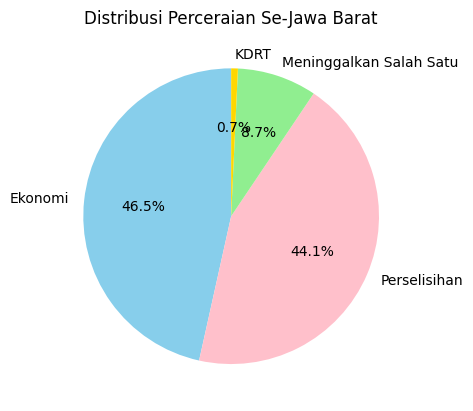

In [51]:
Kategori_counts = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum()

plt.pie(Kategori_counts, 
        labels=Kategori_counts.index, 
        autopct='%1.1f%%', 
        colors=['skyblue', 'pink', 'lightgreen', 'gold'], 
        startangle=90)

plt.title("Distribusi Perceraian Se-Jawa Barat")
plt.show()

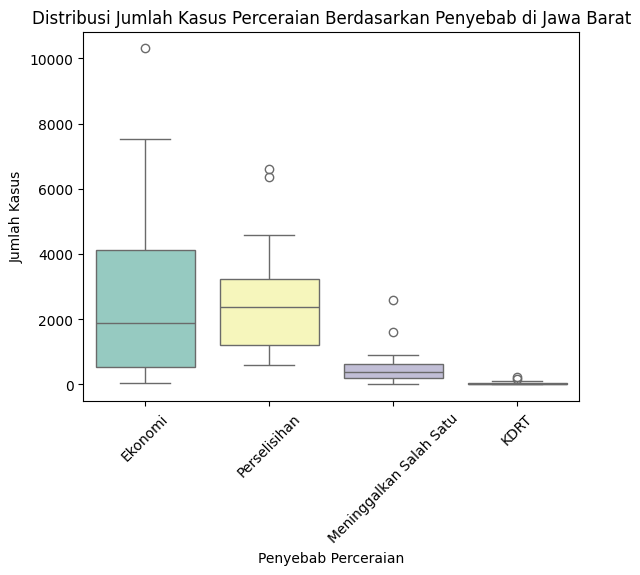

In [52]:
#dikarenakan boxplot hanya menggunakan satu data df.melt kegunaanya data yang banyak akan disatukan.
df_melted = df.melt(id_vars=['nama daerah jawa barat'], 
                    value_vars=['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT'],
                    var_name='Penyebab', 
                    value_name='Jumlah_Kasus')

sns.boxplot(
    data=df_melted,
    x='Penyebab',
    y='Jumlah_Kasus',
    hue='Penyebab',
    palette='Set3',
    legend=False
)

plt.title("Distribusi Jumlah Kasus Perceraian Berdasarkan Penyebab di Jawa Barat")
plt.xlabel("Penyebab Perceraian")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

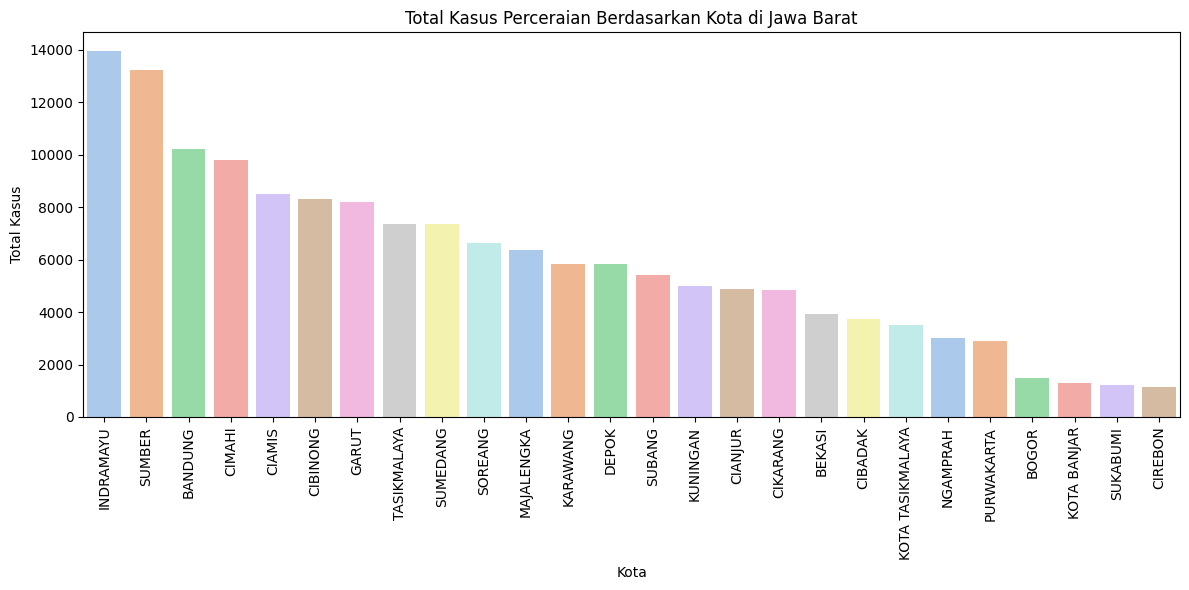

In [53]:
#Menghitung Total Kasus per daerah
df['Total_Kasus'] = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum(axis=1)
#Mengurutkan data berdasarkan jumlah kasus yang ada 
df_sorted = df.sort_values(by='Total_Kasus', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sorted,
    x='nama daerah jawa barat',
    y='Total_Kasus',             
    estimator=sum,
    hue='nama daerah jawa barat',          
    palette='pastel'
)


plt.title("Total Kasus Perceraian Berdasarkan Kota di Jawa Barat")
plt.xlabel("Kota")
plt.ylabel("Total Kasus")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

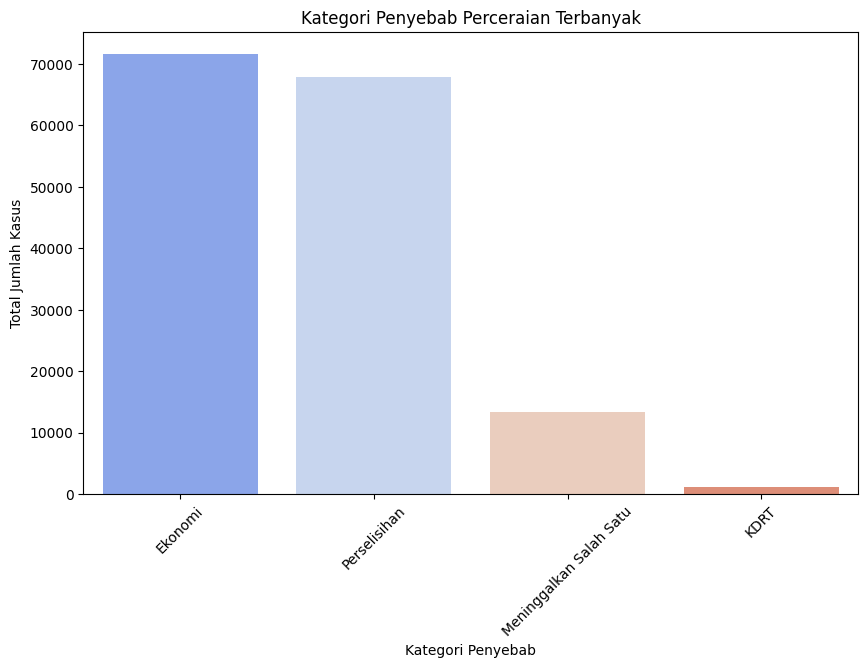

In [54]:
#sum().sort_values(ascending=False) ini menggantikan order=df['...'].value_counts().index . dikarenakan data ini berupa angka 
kategori_counts = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=kategori_counts.index,
    y=kategori_counts.values,
    hue=kategori_counts.index,
    palette='coolwarm',
    legend=False
)

plt.title("Kategori Penyebab Perceraian Terbanyak")
plt.xlabel("Kategori Penyebab")
plt.ylabel("Total Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

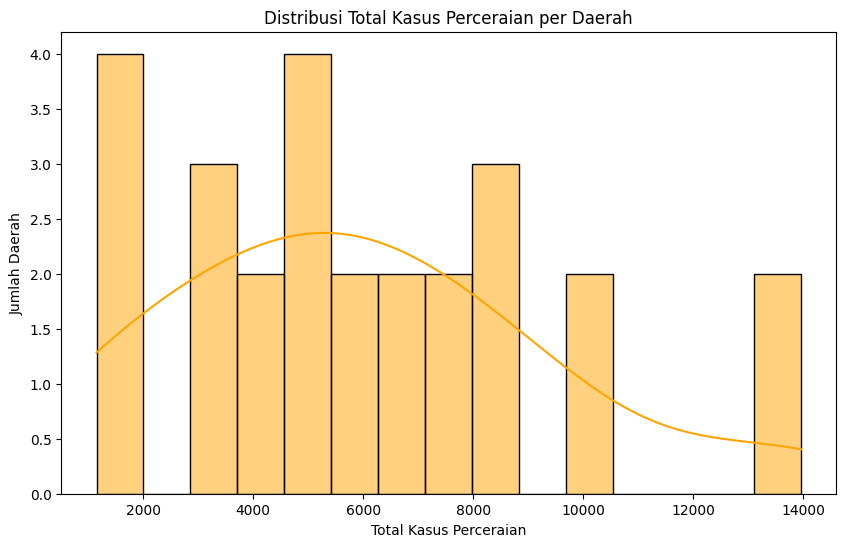

In [55]:
#Menghitung Total Kasus per daerah
df['Total_Kasus'] = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Kasus'],
             kde=True,
             color='orange',
             bins=15)

plt.title("Distribusi Total Kasus Perceraian per Daerah")
plt.xlabel("Total Kasus Perceraian")
plt.ylabel("Jumlah Daerah")
plt.show()

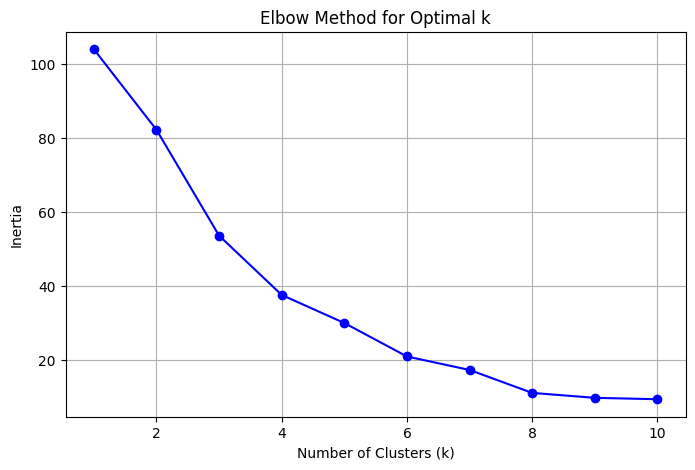

In [56]:
# Memilih fitur untuk clustering
features = [
    "Ekonomi",
    "Perselisihan",
    "Meninggalkan Salah Satu",
    "KDRT"
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

inertia = []
K_values = range(1, 11)

# Hitung inertia setiap k
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

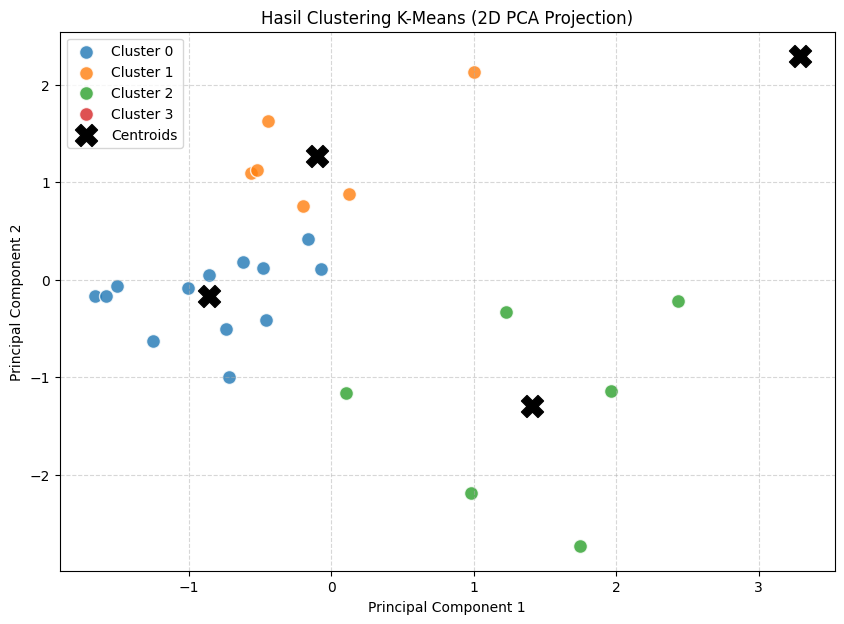

In [57]:
# Menggunakan jumlah cluster optimal
optimal_k = 4 # Berdasarkan elbow method (misalnya)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Mengurangi dimensi data untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
# Warna untuk setiap cluster

colors = cm.tab10(range(optimal_k))


# Plot hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1],
                s=100, 
                label=f'Cluster {cluster}',
                color=colors[cluster],
                edgecolors='white', 
                alpha=0.8)

# Menambahkan centroid pada plot
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=250,
            c='black',
            marker='X',
            label='Centroids')

# Menambahkan detail plot
plt.title("Hasil Clustering K-Means (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()